# Exploring Origin Bus Stop - Destination Bus Stop Flows

Goh Si Hui  
October 27, 2024

# Setting up the environment

In [ ]:
pacman::p_load(tmap, sf, DT, stplanr, tidyverse)


# Importing the Data

## Passenger Volume by Origin Destination Bus Stops

In [ ]:
odbus_apr <- read_csv("data/aspatial/origin_destination_bus_202404.csv")


Rows: 5667461 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): YEAR_MONTH, DAY_TYPE, PT_TYPE, ORIGIN_PT_CODE, DESTINATION_PT_CODE
dbl (2): TIME_PER_HOUR, TOTAL_TRIPS

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

## Busstops Location

In [ ]:
busstops <- st_read(dsn = "data/spatial",
                   layer = "BusStop")


Reading layer `BusStop' from data source 
  `C:\sihuihui\mitbcapstone\notebooks\data\spatial' using driver `ESRI Shapefile'
Simple feature collection with 5166 features and 3 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 3970.122 ymin: 26482.1 xmax: 48285.52 ymax: 52983.82
Projected CRS: SVY21

Rows: 5,166
Columns: 4
$ BUS_STOP_N <chr> "65059", "16171", "61101", "01239", "17269", "11291", "1153…
$ BUS_ROOF_N <chr> "B12", "B06", "NIL", "B01", "B01", "B17", "B12", "B05", "B0…
$ LOC_DESC   <chr> "ST ANNE'S CH", "YUSOF ISHAK HSE", "BLK 120", "SULTAN PLAZA…
$ geometry   <POINT [m]> POINT (35565.66 41659.52), POINT (21439.91 31253.63),…

In [ ]:
busstops <- st_transform(busstops, crs = 3414)
glimpse(busstops)


Rows: 5,166
Columns: 4
$ BUS_STOP_N <chr> "65059", "16171", "61101", "01239", "17269", "11291", "1153…
$ BUS_ROOF_N <chr> "B12", "B06", "NIL", "B01", "B01", "B17", "B12", "B05", "B0…
$ LOC_DESC   <chr> "ST ANNE'S CH", "YUSOF ISHAK HSE", "BLK 120", "SULTAN PLAZA…
$ geometry   <POINT [m]> POINT (35565.66 41659.52), POINT (21439.91 31253.63),…

## Singapore Master Plan 2019 Subzone Data

In [ ]:
mpsz <- st_read(dsn = "data/spatial",
                layer = "MPSZ-2019") 


Reading layer `MPSZ-2019' from data source 
  `C:\sihuihui\mitbcapstone\notebooks\data\spatial' using driver `ESRI Shapefile'
Simple feature collection with 332 features and 6 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 103.6057 ymin: 1.158699 xmax: 104.0885 ymax: 1.470775
Geodetic CRS:  WGS 84

Simple feature collection with 332 features and 6 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 103.6057 ymin: 1.158699 xmax: 104.0885 ymax: 1.470775
Geodetic CRS:  WGS 84
First 10 features:
                 SUBZONE_N SUBZONE_C       PLN_AREA_N PLN_AREA_C       REGION_N
1              MARINA EAST    MESZ01      MARINA EAST         ME CENTRAL REGION
2         INSTITUTION HILL    RVSZ05     RIVER VALLEY         RV CENTRAL REGION
3           ROBERTSON QUAY    SRSZ01  SINGAPORE RIVER         SR CENTRAL REGION
4  JURONG ISLAND AND BUKOM    WISZ01  WESTERN ISLANDS         WI    WEST REGION
5             FORT CANNING    MUSZ02           MUSEUM         MU CENTRAL REGION
6         MARINA EAST (MP)    MPSZ05    MARINE PARADE         MP CENTRAL REGION
7                   SUDONG    WISZ03  WESTERN ISLANDS         WI    WEST REGION
8                  SEMAKAU    WISZ02  WESTERN ISLANDS         WI    WEST REGION
9           SOUTHERN GROUP    SISZ02 SOUTHERN ISLANDS        

In [ ]:
mpsz <- st_transform(mpsz, crs = 3414)
mpsz


Simple feature collection with 332 features and 6 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 2667.538 ymin: 15748.72 xmax: 56396.44 ymax: 50256.33
Projected CRS: SVY21 / Singapore TM
First 10 features:
                 SUBZONE_N SUBZONE_C       PLN_AREA_N PLN_AREA_C       REGION_N
1              MARINA EAST    MESZ01      MARINA EAST         ME CENTRAL REGION
2         INSTITUTION HILL    RVSZ05     RIVER VALLEY         RV CENTRAL REGION
3           ROBERTSON QUAY    SRSZ01  SINGAPORE RIVER         SR CENTRAL REGION
4  JURONG ISLAND AND BUKOM    WISZ01  WESTERN ISLANDS         WI    WEST REGION
5             FORT CANNING    MUSZ02           MUSEUM         MU CENTRAL REGION
6         MARINA EAST (MP)    MPSZ05    MARINE PARADE         MP CENTRAL REGION
7                   SUDONG    WISZ03  WESTERN ISLANDS         WI    WEST REGION
8                  SEMAKAU    WISZ02  WESTERN ISLANDS         WI    WEST REGION
9           SOUTHERN GROUP    SISZ02 SOUTHERN I

# Generate Hexagon Layer

hexagon grid with 400m from 1 edge to the opposite

In [ ]:
hex_layer <-
  st_make_grid(mpsz,
               cellsize = 400,
               what = "polygon",
               square = FALSE) %>%
  st_sf()


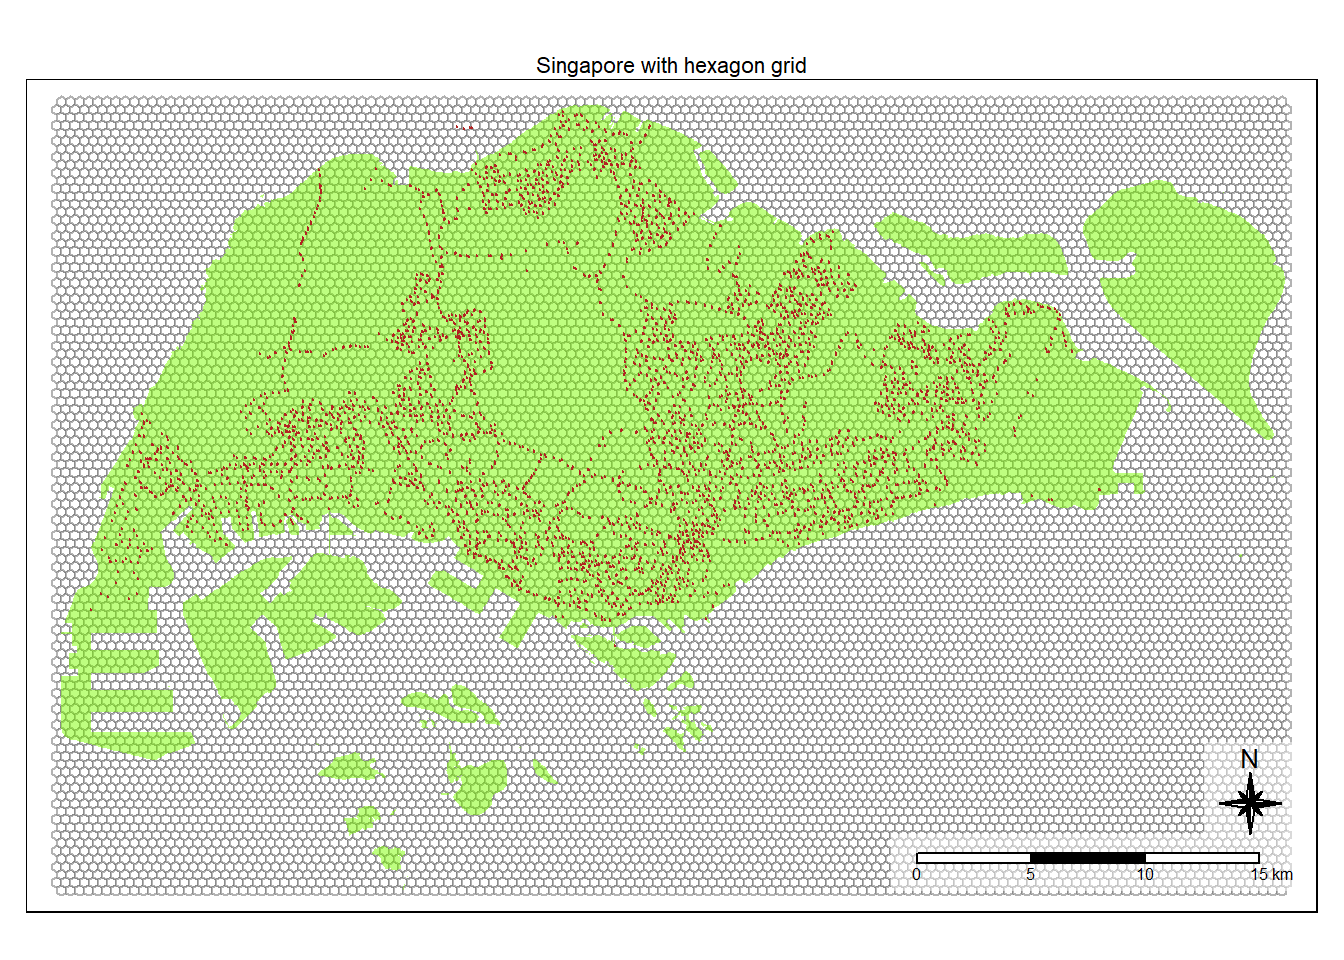

In [ ]:
tm_shape(hex_layer) +
  tm_fill(col = "white", title = "Hexagons") +
  tm_borders(alpha = 0.5) +
  tm_layout(main.title = "Singapore with hexagon grid",
            main.title.position = "center",
            main.title.size = 0.7,
            legend.height = 0.35, 
            legend.width = 0.35,
            frame = TRUE) +
  tm_compass(type="8star", size = 2, bg.color = "white", bg.alpha = 0.5) +
  tm_scale_bar(bg.color = "white", bg.alpha = 0.5) +
  tm_shape(mpsz) +
  tm_fill("lawngreen", title = "Singapore Boundary", alpha = 0.5) +
  tm_shape(busstops) +
  tm_dots(col = "firebrick", size = 0.005, title = "Bus Stops")


filter out busstops outside of singapore

In [ ]:
busstops$bs_sg = lengths(st_intersects(busstops, mpsz))
busstops <- filter(busstops, bs_sg > 0) %>%
  select(, -bs_sg)
  
busstops


Simple feature collection with 5161 features and 3 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 3970.122 ymin: 26482.1 xmax: 48285.52 ymax: 49903.39
Projected CRS: SVY21 / Singapore TM
First 10 features:
   BUS_STOP_N BUS_ROOF_N                 LOC_DESC                  geometry
1       65059        B12             ST ANNE'S CH POINT (35565.66 41659.52)
2       16171        B06          YUSOF ISHAK HSE POINT (21439.91 31253.63)
3       61101        NIL                  BLK 120 POINT (31381.06 35313.49)
4       01239        B01             SULTAN PLAZA POINT (31152.55 31688.08)
5       17269        B01                  BLK 730  POINT (20134.2 31917.38)
6       11291        B17      COLD STORAGE JELITA POINT (22723.57 33349.85)
7       11531        B12 OPP LEA HIN HARDWARE FTY POINT (25112.11 30368.68)
8       46529        B05        OPP MARSILING STN POINT (21465.51 45974.12)
9       95151        B01       AIRPORT POLICE STN POINT (44529.73 36038.38)
10      71169 

Remove hexagons without bus stop

In [ ]:
hex_layer$n_busstops = lengths(st_intersects(hex_layer, busstops))
hex_layer <- filter(hex_layer, n_busstops > 0) 


tmap style set to "natural"

other available styles are: "white", "gray", "cobalt", "col_blind", "albatross", "beaver", "bw", "classic", "watercolor" 

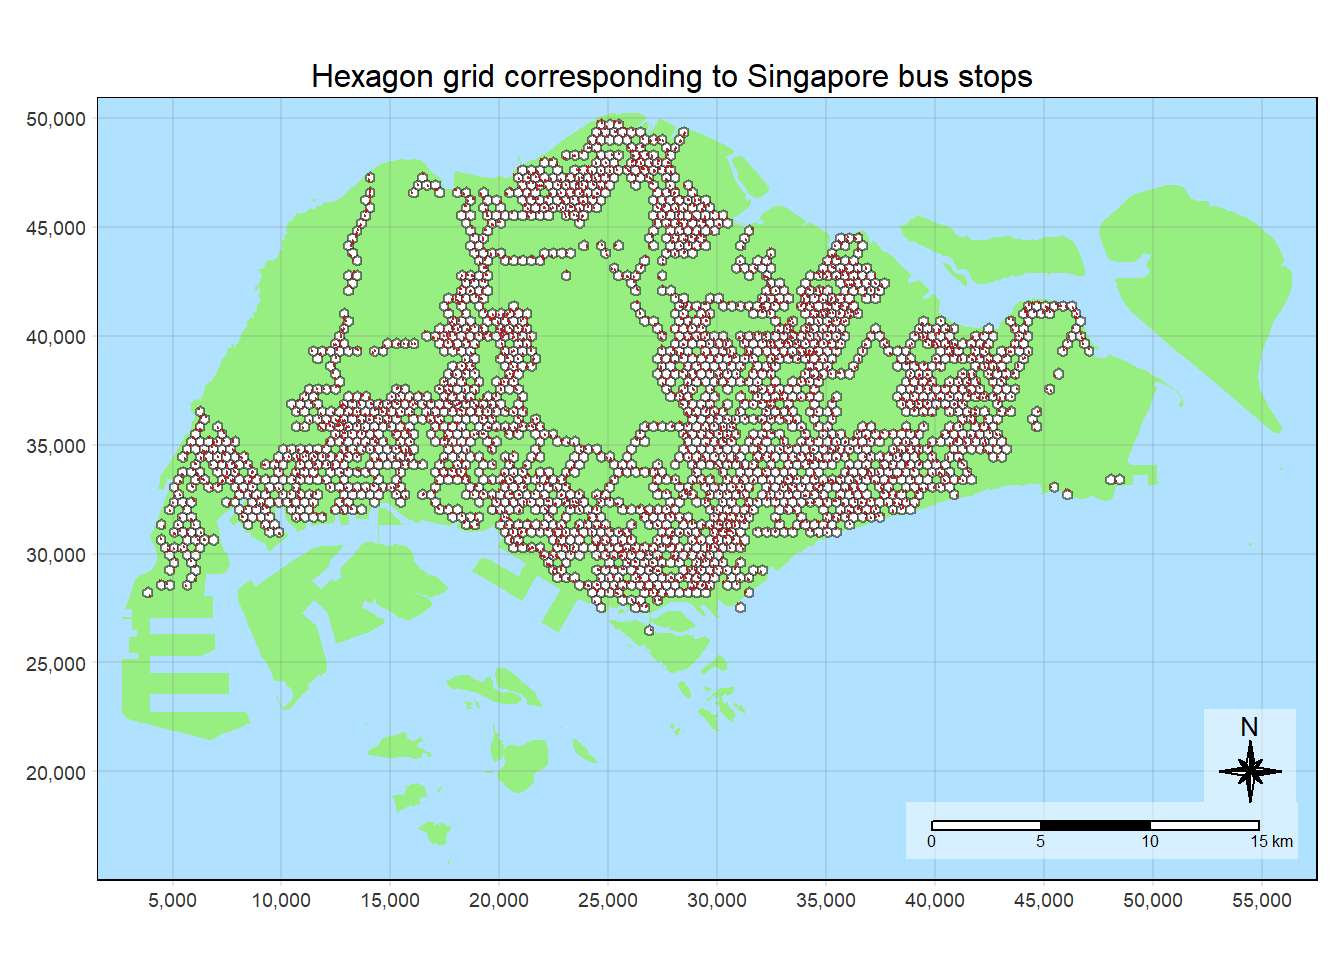

In [ ]:
tmap_style("natural")


## Assign ids to each hexagon

In [ ]:
hex_layer$hex_id <- sprintf("H%04d", seq_len(nrow(hex_layer))) %>% as.factor()
head(hex_layer)


Simple feature collection with 6 features and 2 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 3667.538 ymin: 27988.55 xmax: 5067.538 ymax: 31568.12
Projected CRS: SVY21 / Singapore TM
                        geometry n_busstops hex_id
1 POLYGON ((3867.538 27988.55...          1  H0001
2 POLYGON ((4467.538 28334.96...          1  H0002
3 POLYGON ((4467.538 30413.42...          1  H0003
4 POLYGON ((4467.538 31106.24...          1  H0004
5 POLYGON ((4667.538 30067.01...          2  H0005
6 POLYGON ((4867.538 28334.96...          1  H0006

# Spatial Interaction Analysis

## Generating Origin - Destination Trips by hexagon level

### Filter out the relevant data

Weekday morning peak hours, which is from 6am to 9am

convert from character to factor data type.

In [ ]:
odbus_apr$ORIGIN_PT_CODE <- as.factor(odbus_apr$ORIGIN_PT_CODE)
odbus_apr$DESTINATION_PT_CODE <- as.factor(odbus_apr$DESTINATION_PT_CODE)


In [ ]:
glimpse(odbus_apr)


Rows: 5,667,461
Columns: 7
$ YEAR_MONTH          <chr> "2024-04", "2024-04", "2024-04", "2024-04", "2024-…
$ DAY_TYPE            <chr> "WEEKENDS/HOLIDAY", "WEEKDAY", "WEEKENDS/HOLIDAY",…
$ TIME_PER_HOUR       <dbl> 16, 16, 14, 14, 17, 17, 17, 17, 7, 17, 14, 10, 20,…
$ PT_TYPE             <chr> "BUS", "BUS", "BUS", "BUS", "BUS", "BUS", "BUS", "…
$ ORIGIN_PT_CODE      <fct> 04168, 04168, 80119, 80119, 44069, 44069, 20281, 2…
$ DESTINATION_PT_CODE <fct> 10051, 10051, 90079, 90079, 17229, 17229, 20141, 2…
$ TOTAL_TRIPS         <dbl> 2, 9, 6, 8, 1, 2, 17, 2, 6, 2, 5, 3, 7, 1, 5, 2, 1…

In [ ]:
AMPeak <- odbus_apr %>%
  filter(DAY_TYPE == "WEEKDAY") %>%
  filter(TIME_PER_HOUR >= 6 &
           TIME_PER_HOUR < 9) %>%
  group_by(ORIGIN_PT_CODE, DESTINATION_PT_CODE) %>%
  summarise(TRIPS = sum(TOTAL_TRIPS)) %>%
  rename(
    ORIGIN_BS = ORIGIN_PT_CODE,
    DEST_BS = DESTINATION_PT_CODE
  )


`summarise()` has grouped output by 'ORIGIN_PT_CODE'. You can override using
the `.groups` argument.

find out the bus stops are in which hexagon

In [ ]:
bs_hex <- st_intersection(busstops, hex_layer) %>%
  st_drop_geometry()%>%
  select(BUS_STOP_N, hex_id)


all geometries

     BUS_STOP_N hex_id
3195      25059  H0001
2523      25751  H0002
247       26379  H0003
2336      26369  H0004
2739      25719  H0005
3542      26389  H0005
2640      25761  H0006
2741      25741  H0007
2740      25711  H0008
1518      26299  H0009
2517      25729  H0010
1691      26399  H0011
2696      25701  H0012
2697      25709  H0012
2822      26289  H0013
2029      26269  H0014
2579      26261  H0014
4750      26461  H0015
1793      26349  H0016
2430      26279  H0016
1455      26251  H0017
1677      26259  H0017
1418      26409  H0018
2667      25631  H0018
1041      26451  H0019
708       26311  H0020
1753      26331  H0021
2755      26249  H0022
3659      26241  H0022
2443      26209  H0023
4451      26201  H0023
2735      25771  H0024
3265      26419  H0025
2666      25621  H0026
4919      26321  H0027
2137      25469  H0028
2490      25451  H0028
4675      25461  H0028
1542      25781  H0029
2795      25801  H0030
787       26441  H0031
2665      25611  H0031
2663      2

join morning peak trips with bs hex

In [ ]:
AMPeak_hex <- AMPeak %>%
  inner_join(bs_hex,
             by = c("ORIGIN_BS" = "BUS_STOP_N")) %>%
  rename(origin_hex_id = hex_id) %>%
  inner_join(bs_hex,
             by = c("DEST_BS" = "BUS_STOP_N")) %>%
  rename(dest_hex_id = hex_id)


Warning in inner_join(., bs_hex, by = c(ORIGIN_BS = "BUS_STOP_N")): Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 14210 of `x` matches multiple rows in `y`.
ℹ Row 3171 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.

Warning in inner_join(., bs_hex, by = c(DEST_BS = "BUS_STOP_N")): Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 136 of `x` matches multiple rows in `y`.
ℹ Row 3216 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.

# A tibble: 6 × 5
# Groups:   ORIGIN_BS [1]
  ORIGIN_BS DEST_BS TRIPS origin_hex_id dest_hex_id
  <chr>     <chr>   <dbl> <fct>         <fct>      
1 01012     01112     193 H1269         H1287      
2 01012     01113     127 H1269         H1287      
3 01012     01121      36 H1269         H1318      
4 01012     01211      72 H1269         H1318      
5 01012     01311     117 H1269         H1347      
6 01012     07371      19 H1269         H1361      

Number of trips by hexagon

In [ ]:
ampeaktrips_hex <- AMPeak_hex %>%
  group_by(origin_hex_id, dest_hex_id) %>%
  summarise(total_trips = sum(TRIPS))


`summarise()` has grouped output by 'origin_hex_id'. You can override using the
`.groups` argument.

# A tibble: 6 × 3
# Groups:   origin_hex_id [1]
  origin_hex_id dest_hex_id total_trips
  <fct>         <fct>             <dbl>
1 H0001         H0005                 1
2 H0001         H0012                 1
3 H0001         H0024                 2
4 H0001         H0029                 2
5 H0001         H0047                 1
6 H0001         H0050                10

## Visualising Spatial Interactions

In [ ]:
flowlines <- ampeaktrips_hex %>% od2line(
  hex_layer,
  zone_code = "hex_id")


Creating centroids representing desire line start and end points.

In [ ]:
write_rds(flowlines, "data/rds/flowlines_apr.rds")


Warning in g$scale * (w_legend/maxW): longer object length is not a multiple of
shorter object length

Warning in g$scale * (x/maxW): longer object length is not a multiple of
shorter object length

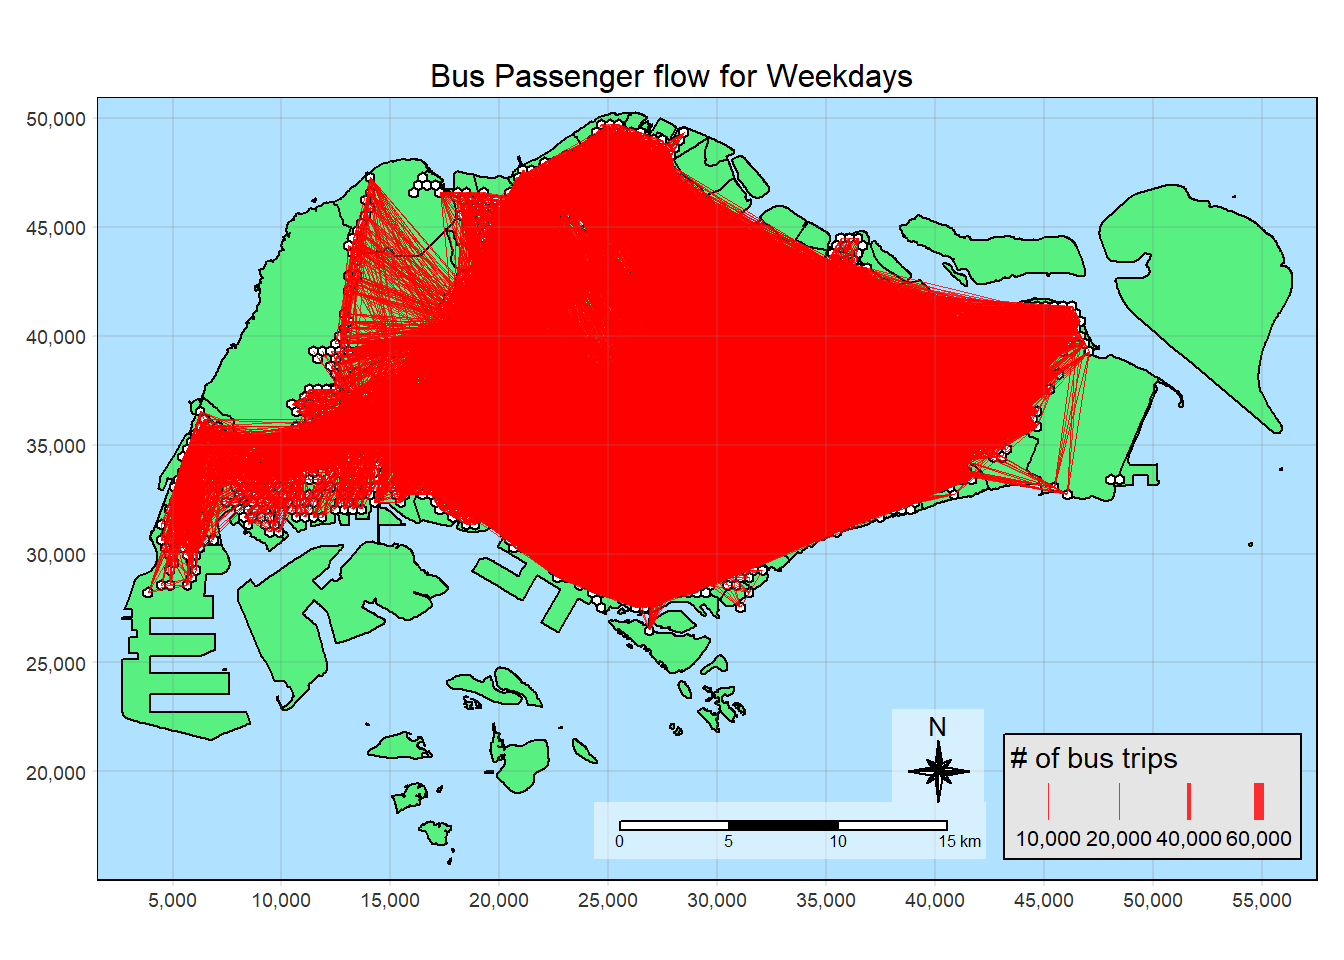

In [ ]:
tm_shape(mpsz) +
  tm_polygons("green", title = "Singapore Boundary", alpha = 0.5) +
  
  tm_shape(hex_layer) +
  tm_polygons(col = "white", title = "Hexagons", alpha = 1) +
  
  tm_shape(flowlines) +
  tm_lines(lwd = "total_trips",
           style = "quantile",
           col = "red",
           scale = c(0.1, 1, 3, 5, 7),
           title.lwd = "# of bus trips",
           alpha = 0.8) +
  
  tm_layout(main.title = "Bus Passenger flow for Weekdays",
            main.title.position = "center",
            main.title.size = 1.0,
            legend.height = 0.35, 
            legend.width = 0.35,
            frame = TRUE) +
  
  tm_compass(type="8star", size = 2, bg.color = "white", bg.alpha = 0.5) +
  tm_scale_bar(bg.color = "white", bg.alpha = 0.5) +
  tm_grid(alpha = 0.2)


In [ ]:
flowlines_df <- flowlines %>% st_drop_geometry()


In [ ]:
quantile(flowlines$total_trips, probs = c(0, 0.125, 0.25, 0.375, 0.50, 0.625, 0.75, 0.875, 0.9, 0.925, 0.95, 0.975, 0.98, 0.985, 0.99, 0.995, 1))


      0%    12.5%      25%    37.5%      50%    62.5%      75%    87.5% 
    1.00     1.00     4.00     8.00    18.00    34.00    70.00   182.00 
     90%    92.5%      95%    97.5%      98%    98.5%      99%    99.5% 
  235.00   320.00   481.00   914.00  1132.00  1470.00  2087.67  3702.78 
    100% 
57572.00 

Warning in g$scale * (w_legend/maxW): longer object length is not a multiple of
shorter object length

Warning in g$scale * (x/maxW): longer object length is not a multiple of
shorter object length

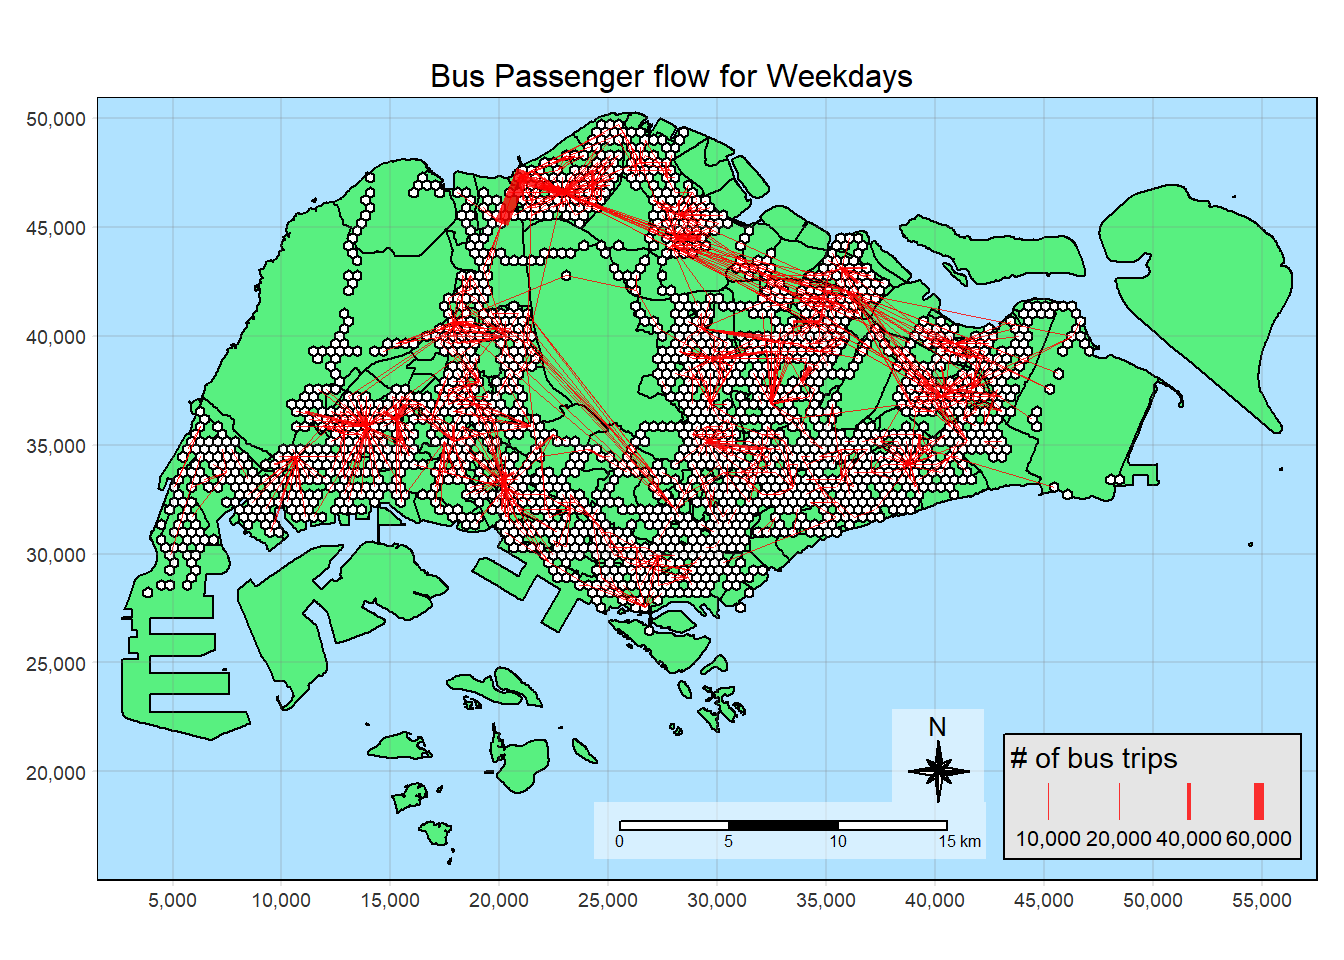

In [ ]:
tm_shape(mpsz) +
  tm_polygons("green", title = "Singapore Boundary", alpha = 0.5) +
  
  tm_shape(hex_layer) +
  tm_polygons(col = "white", title = "Hexagons", alpha = 1) +
  
  tm_shape(flowlines %>% filter(total_trips >2088)) +
  tm_lines(lwd = "total_trips",
           style = "quantile",
           col = "red",
           scale = c(0.1, 1, 3, 5, 7),
           title.lwd = "# of bus trips",
           alpha = 0.8) +
  
  tm_layout(main.title = "Bus Passenger flow for Weekdays",
            main.title.position = "center",
            main.title.size = 1.0,
            legend.height = 0.35, 
            legend.width = 0.35,
            frame = TRUE) +
  
  tm_compass(type="8star", size = 2, bg.color = "white", bg.alpha = 0.5) +
  tm_scale_bar(bg.color = "white", bg.alpha = 0.5) +
  tm_grid(alpha = 0.2)
